In [1]:
# The names of patients were generated using faker.

# import csv
# from faker import Faker
# import datetime

# def datagenerate(records, headers):
#     fake = Faker('en_IN')
#     with open("C:/Users/malu/Documents/webmd_names.csv", 'wt') as csvFile:
#         writer = csv.DictWriter(csvFile, fieldnames=headers)
#         writer.writeheader()
#         for i in range(records):
#            # full_name = fake.name()
#             male_name = fake.name_male(),
#             female_name = fake.name_female()
            
#             writer.writerow({
#                  #"Name": fake.name(),
#                 "Male name": fake.name_male(),
#                 "Female name": fake.name_female()
#                     })
    
# if __name__ == '__main__':
#     records = 300000
#     headers = ["Male name","Female name"]
#     datagenerate(records, headers)
#     print("CSV generation complete!")

# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset to Python Environment

In [3]:
data=pd.read_excel(r'C:\Users\malu\Desktop\Drugs.xlsx')
data_ori=data.copy() #Making a copy of the dataset.

# About the Dataset

* Patient's Name: name of each patients
* Drug (categorical): name of drug
* DrugId (numerical): drug id
* Condition (categorical): name of condition
* Review (text): patient review
* Side (text): side effects associated with drug (if any)
* EaseOfUse (numerical): 5 star rating
* Effectiveness (numerical): 5 star rating
* Satisfaction (numerical): 5 star rating
* Date (date): date of review entry
* UsefulCount (numerical): number of users who found review useful.
* Age (numerical): age group range of user
* Sex (categorical): gender of user

# Basic details of the dataset

In [4]:
# Checking the shape of the dataset
data.shape

(362777, 13)

In [5]:
data.head()

,Age,Patient's Name,Date,DrugId,Drug,Condition,Sides,Reviews,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
0,55-64,Vardaniya Mallick,2015-02-11 00:00:00,54205,12 hour decongestant,Runny Nose,"Nausea , vomiting , trouble sleeping , dizz...",,3,3,3,Male,1
1,55-64,Dishani Bali,2015-02-11 00:00:00,54205,12 hour decongestant,Runny Nose,"Nausea , vomiting , trouble sleeping , dizz...",,4,4,3,Male,1
2,55-64,Darshit Khalsa,2015-02-11 00:00:00,54205,12 hour decongestant,Runny Nose,"Nausea , vomiting , trouble sleeping , dizz...",,5,2,3,Male,9
3,55-64,Kabir Tata,2015-02-11 00:00:00,54205,12 hour decongestant,Runny Nose,"Nausea , vomiting , trouble sleeping , dizz...","Well, my stuffed up nose is no longer stuffed ...",5,5,5,Male,2
4,55-64,Ryan Mane,2015-02-11 00:00:00,54205,12 hour decongestant,Runny Nose,"Nausea , vomiting , trouble sleeping , dizz...",,1,4,1,Male,0


In [6]:
# Checking the basic info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362777 entries, 0 to 362776
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Age             362777 non-null  object
 1   Patient's Name  362777 non-null  object
 2   Date            362777 non-null  object
 3   DrugId          362777 non-null  int64 
 4   Drug            362777 non-null  object
 5   Condition       362777 non-null  object
 6   Sides           362777 non-null  object
 7   Reviews         362728 non-null  object
 8   EaseofUse       362777 non-null  int64 
 9   Effectiveness   362777 non-null  int64 
 10  Satisfaction    362777 non-null  int64 
 11  Sex             362777 non-null  object
 12  UsefulCount     362777 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 36.0+ MB


In [7]:
#Checking for any missing values.
data.isna().sum()

Age                0
Patient's Name     0
Date               0
DrugId             0
Drug               0
Condition          0
Sides              0
Reviews           49
EaseofUse          0
Effectiveness      0
Satisfaction       0
Sex                0
UsefulCount        0
dtype: int64

In [8]:
# There are some missing values which will be dealt later.

In [9]:
# Finding the unique counts of each features
print('Age:',data['Age'].nunique())
print("Patient's Name:",data["Patient's Name"].nunique())
print('Date:',data['Date'].nunique())
print('Drug_Id:', data['DrugId'].nunique())
print('Drug:',data['Drug'].nunique())
print('Condition:',data['Condition'].nunique())
print('Sides:',data['Sides'].nunique())
print('Reviews:',data['Reviews'].nunique())
print('EaseofUse:',data['EaseofUse'].nunique())
print('Effectiveness:',data['Effectiveness'].nunique())
print('Satisfaction:',data['Satisfaction'].nunique())
print('Sex:',data['Sex'].nunique())
print('UsefulCount:',data['UsefulCount'].nunique())

Age: 12
Patient's Name: 87578
Date: 4524
Drug_Id: 6569
Drug: 7090
Condition: 1805
Sides: 1968
Reviews: 250132
EaseofUse: 7
Effectiveness: 7
Satisfaction: 7
Sex: 3
UsefulCount: 148


1) Here, columns "Patient's Name" and "Reviews" has many unique values. It will be better to drop these as they contribute little to the dataset.

2) Also, there are more Drug than DrugId values, which suggests some kind of peculiarity in the way drugs are named.

3) There are many Condition types, a closer look may be required to see the distribution.

4) The values of 'EaseofUse', 'Effectiveness' and 'Satisfaction, is supposed to be from 1 to 5. Some reviews may have wrong or missing values.

5) Also, Sex has more values than which are considered possible.

# Pre-Processing

#### Checking for Missing Values

In [10]:
# Earlier, '.isna().sum()' did not show any null values except for reviews. 
# But, since the dataset includes some missing values a deeper look into it is needed.

import altair as alt
import itertools
def missing_values(data):
    """Returns a summary of missing values in df"""
    nrows = data.shape[0]
    data1 = []
    
    def pct(n, total):
        return round(n/total, 2)
    
    for col in data.columns:

        # string (Object) type columns
        if data[col].dtype.kind == "O":
            data[col] = data[col].str.strip()
            nulls = data[data[col] == ""][col].count()
            nulls += data[col].isnull().sum()

        # numerical (int) type columns
        elif data[col].dtype.kind == "i":
            nulls = data[col].isnull().sum()

        pctofnulls = pct(nulls, nrows)
        data1.extend(
            [{"column": col, "pct": 1-pctofnulls, "num of records": nrows-nulls, "type": "not missing"},
             {"column": col, "pct": pctofnulls, "num of records": nulls, "type": "missing"}])
    
    return pd.DataFrame(data1)

missing = missing_values(data)

bars = (alt.Chart()
           .mark_bar(size=25, 
                     strokeWidth=1,
                     stroke="white",
                     strokeOpacity=0.7,
                     )
           .encode(x=alt.X("sum(num of records)",
                           axis=alt.Axis(title="number of records",
                                         grid=True)), 
                   y=alt.Y("column:O",
                           axis=alt.Axis(title="columns")),
                   tooltip=("column", "type", "num of records:Q",
                            alt.Tooltip("pct:Q", format=".1%")),
                   color=alt.Color("type",
                                   scale=alt.Scale(range=["#11043a", "#648bce"])))
           .properties(title="Missing Values"))

text = (alt.Chart()
           .mark_text(align="right",
                      dx=-1)
           .encode(x=alt.X("sum(num of records)", 
                           stack="zero"),
                   y=alt.Y("column"),
                   color=alt.Color("type",
                                   legend=None,
                                   scale=alt.Scale(range=["white"])),
                   text=alt.Text("pct", format=".0%")))

(alt.layer(bars, text, data=missing)
    .configure(background='#11043a')
    .configure_title(font="Arial",
                     fontSize=18,
                     color="#e6f3ff",
                     dy=-10)
    .configure_text(color="white")
    .configure_legend(titleFontSize=12,
                      titleColor="white",
                      tickCount=10,
                      titleOpacity=0.8,
                      labelColor="white",
                      labelOpacity=0.7,
                      titlePadding=10)
    .configure_axis(titleFontSize=13,
                    titlePadding=20,
                    titleColor="white",
                    titleOpacity=0.8,
                    labelFontSize=11,
                    labelColor="white",
                    labelOpacity=0.7,
                    tickOffset=0,
                    grid=False,
                    gridOpacity=0.15)
    .configure_view(strokeWidth=0)
    .resolve_scale(color='independent')
    .properties(height=300, width=680))


alt.LayerChart(...)

The above plot shows about 3% in Age, 39% in Date 12% in Reviews, 7% missing values in Sex and 2% in Sides as well. Since Date and Reviews are of less importance, we need not bother about it.

First removing the 3% of missing values in Age. 

In [11]:
data['Age'].value_counts().sort_index()

              12201
0-2             497
03-06           837
07-12          1644
13-18          7045
19-24         24230
25-34         49718
35-44         55011
45-54         80043
55-64         75109
65-74         41216
75 or over    15226
Name: Age, dtype: int64

In [12]:
# The unlabelled count of 12202 is the missing values. Before removing them, let's label encode 'Age'.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Age']=le.fit_transform(data['Age']) 
data['Age'].value_counts().sort_index()

0     12201
1       497
2       837
3      1644
4      7045
5     24230
6     49718
7     55011
8     80043
9     75109
10    41216
11    15226
Name: Age, dtype: int64

In [13]:
# Now dropping the missing values, here with index 0.
data.drop(data[data['Age'] < 1].index, inplace=True)

In [14]:
data['Age'].value_counts().sort_index()

1       497
2       837
3      1644
4      7045
5     24230
6     49718
7     55011
8     80043
9     75109
10    41216
11    15226
Name: Age, dtype: int64

In [15]:
# The unlabelled values are removed.

Next is Sex column.

In [16]:
data['Sex'].value_counts().sort_index()

           18947
Female    234849
Male       96780
Name: Sex, dtype: int64

In [17]:
data['Sex'].unique()

array(['Male', 'Female', ''], dtype=object)

In [18]:
# Let's label the missing values as 'Others'
data['Sex']=data['Sex'].replace([''],'Others')
data['Sex'].value_counts().sort_index()

Female    234849
Male       96780
Others     18947
Name: Sex, dtype: int64

The missing values in Sides are also to be removed.

In [19]:
for col in ["Sides"]:
    data = data[(data[col].astype(bool) & data[col].notnull())]

In [20]:
data.shape

(345163, 13)

In [21]:
# Now the missing values are handled.

Next, let's deal with 'Satisfaction', 'EaseofUse' and 'Effectiveness' columns.

In [22]:
data['Satisfaction'].value_counts().sort_index()

1      96657
2      33909
3      49549
4      59927
5     105118
6          2
10         1
Name: Satisfaction, dtype: int64

In [23]:
data['EaseofUse'].value_counts().sort_index()

1      34399
2      17439
3      39297
4      71350
5     182675
6          2
10         1
Name: EaseofUse, dtype: int64

In [24]:
data['Effectiveness'].value_counts().sort_index()

1      56662
2      29499
3      57839
4      77945
5     123215
6          2
10         1
Name: Effectiveness, dtype: int64

In [25]:
# The Satisfaction, EaseofUse and Effectiveness are out of 5 but here there are ratings as 6 and 10. 
# So these two values are replaced to as a rating of 5.
data['Satisfaction'] = data['Satisfaction'].replace([6],5)
data['Satisfaction'] = data['Satisfaction'].replace([10],5)
# Similarly,
data['EaseofUse'] = data['EaseofUse'].replace([6],5)
data['EaseofUse'] = data['EaseofUse'].replace([10],5)
data['Effectiveness'] = data['Effectiveness'].replace([6],5)
data['Effectiveness'] = data['Effectiveness'].replace([10],5)

In [26]:
data['Satisfaction'].value_counts().sort_index()

1     96657
2     33909
3     49549
4     59927
5    105121
Name: Satisfaction, dtype: int64

In [27]:
# Let's drop the columns Patient's Name, Reviews and Date. 
data = data.drop(["Patient's Name", "Date", "Reviews"], axis=1)

In [28]:
data.shape

(345163, 10)

In [29]:
# Again let's check for any missing values.
def missing_values(data):
    """Returns a summary of missing values in df"""
    nrows = data.shape[0]
    data1 = []
    
    def pct(n, total):
        return round(n/total, 2)
    
    for col in data.columns:

        # string (Object) type columns
        if data[col].dtype.kind == "O":
            data[col] = data[col].str.strip()
            nulls = data[data[col] == ""][col].count()
            nulls += data[col].isnull().sum()

        # numerical (int) type columns
        elif data[col].dtype.kind == "i":
            nulls = data[col].isnull().sum()

        pctofnulls = pct(nulls, nrows)
        data1.extend(
            [{"column": col, "pct": 1-pctofnulls, "num of records": nrows-nulls, "type": "not missing"},
             {"column": col, "pct": pctofnulls, "num of records": nulls, "type": "missing"}])
    
    return pd.DataFrame(data1)

missing = missing_values(data)

bars = (alt.Chart()
           .mark_bar(size=25, 
                     strokeWidth=1,
                     stroke="white",
                     strokeOpacity=0.7,
                     )
           .encode(x=alt.X("sum(num of records)",
                           axis=alt.Axis(title="number of records",
                                         grid=True)), 
                   y=alt.Y("column:O",
                           axis=alt.Axis(title="columns")),
                   tooltip=("column", "type", "num of records:Q",
                            alt.Tooltip("pct:Q", format=".1%")),
                   color=alt.Color("type",
                                   scale=alt.Scale(range=["#11043a", "#648bce"])))
           .properties(title="Missing Values"))

text = (alt.Chart()
           .mark_text(align="right",
                      dx=-1)
           .encode(x=alt.X("sum(num of records)", 
                           stack="zero"),
                   y=alt.Y("column"),
                   color=alt.Color("type",
                                   legend=None,
                                   scale=alt.Scale(range=["white"])),
                   text=alt.Text("pct", format=".0%")))

(alt.layer(bars, text, data=missing)
    .configure(background='#11043a')
    .configure_title(font="Arial",
                     fontSize=18,
                     color="#e6f3ff",
                     dy=-10)
    .configure_text(color="white")
    .configure_legend(titleFontSize=12,
                      titleColor="white",
                      tickCount=10,
                      titleOpacity=0.8,
                      labelColor="white",
                      labelOpacity=0.7,
                      titlePadding=10)
    .configure_axis(titleFontSize=13,
                    titlePadding=20,
                    titleColor="white",
                    titleOpacity=0.8,
                    labelFontSize=11,
                    labelColor="white",
                    labelOpacity=0.7,
                    tickOffset=0,
                    grid=False,
                    gridOpacity=0.15)
    .configure_view(strokeWidth=0)
    .resolve_scale(color='independent')
    .properties(height=300, width=680))


alt.LayerChart(...)

In [30]:
# Now all the missing values are removed.

#### Checking for Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1f78071b648>,
 'caps': [<matplotlib.lines.Line2D at 0x1f780766e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f780764748>],
 'medians': [<matplotlib.lines.Line2D at 0x1f780773b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f78076fd88>],
 'means': []}

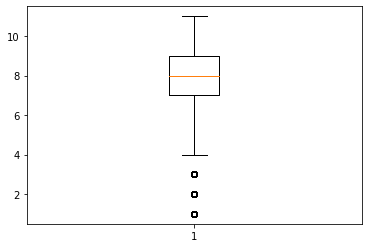

In [31]:
plt.boxplot(data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f7808c7f88>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7808dfb88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7808cec88>],
 'medians': [<matplotlib.lines.Line2D at 0x1f7808dfd08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7f23c56c8>],
 'means': []}

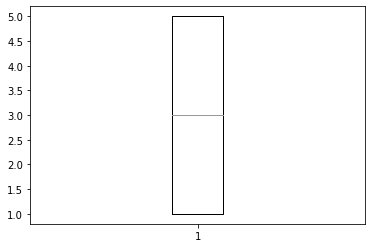

In [32]:
plt.boxplot(data['Satisfaction'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f78090d288>,
 'caps': [<matplotlib.lines.Line2D at 0x1f780921dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f780913088>],
 'medians': [<matplotlib.lines.Line2D at 0x1f780921f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f780926bc8>],
 'means': []}

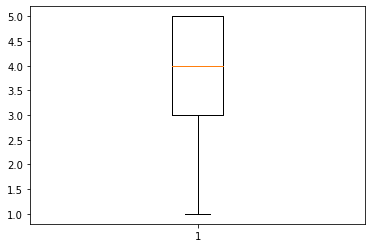

In [33]:
plt.boxplot(data['Effectiveness'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f78094e348>,
 'caps': [<matplotlib.lines.Line2D at 0x1f780963e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f780958d48>],
 'medians': [<matplotlib.lines.Line2D at 0x1f780966c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f780969f88>],
 'means': []}

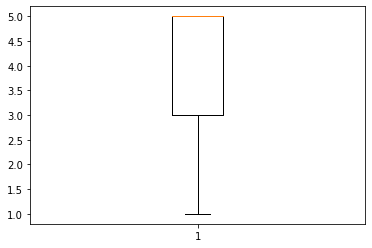

In [34]:
plt.boxplot(data['EaseofUse'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f780991b88>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7809aaf08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7809970c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f7809add08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7809addc8>],
 'means': []}

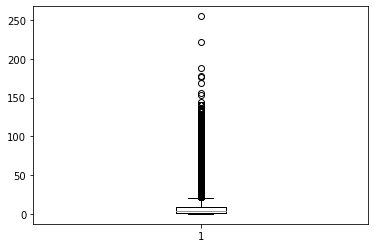

In [35]:
plt.boxplot(data['UsefulCount'])

<AxesSubplot:ylabel='DrugId'>

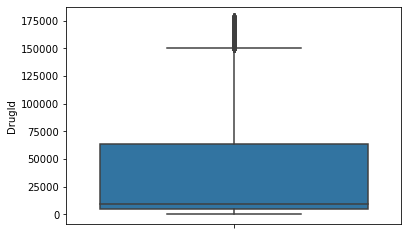

In [36]:
sns.boxplot(y=data['DrugId'],data=data)

In [37]:
# Earlier we saw that there were some mismatch between Drug and DrugId, let's take a deeper look into it.
drugs = {}
for drugid, drug in data[["DrugId", "Drug"]].itertuples(index=False):
    drugs.setdefault(drugid, set()).add(drug)
drugs = {k:list(v) for k,v in drugs.items()}

drugs_with_more_names = {k:list(v) for k,v in drugs.items() if len(v) > 1}
for k,v in dict(itertools.islice(drugs_with_more_names.items(), 10)).items():
    print(f"{k:10}: {list(v)[:2]}")

     92793: ['a thru z select', 'a thru z select tablet multivitamins']
     93217: ['acid controller tablet peptic ulcer agents', 'acid controller']
    153189: ['acid reducer (famotidine) 20 mg tablet', 'acid reducer (famotidine) 10 mg tablet']
    153190: ['acid reducer tablet', 'acid reducer tablet peptic ulcer agents']
     16383: ['actonel 35 mg tablet', 'actonel tablet osteoporosis agents']
      5231: ['acyclovir ointment', 'acyclovir cream']
      6143: ['advil tablet', 'advil tablet, chewable']
      6062: ['albuterol sulfate', 'albuterol sulfate tablet, extended release 12 hr']
      4872: ['albuterol sulfate hfa aerosol with adapter beta-adrenergic agents short-acting (inhaled)', 'albuterol sulfate vial for nebulizer beta-adrenergic agents short-acting (inhaled)']
     21057: ['alemtuzumab 30 mg/ml intravenous solution', 'alemtuzumab solution']


This shows the reason why Drug has more values than DrugId. It is because some drugs are sold in different forms, like cream, pill, gel, etc. Since there are a lot of such mismatch (shown below), I am not considering the Drug instead I am only taking the DrugId.

* 7286: ['loteprednol etabonate drops, gel', 'loteprednol etabonate ointment'],
* 7319: ['lotemax drops, gel', 'lotemax ointment'],
* 164437: ['lorcaserin tablet, extended release 24 hr', 'lorcaserin tablet'],
* 8892: ['lorazepam concentrate', 'lorazepam'],
* 76548: ['loratadine d', 'loratadine-d'],
* 73: ['loratadine tablet,disintegrating', 'loratadine'],
*  8555: ['loprox cream', 'loprox suspension, topical'],
*  4789: ['loperamide', 'loperamide liquid']
* 16383: ['actonel', 'actonel 35 mg tablet'] 
*   6062: ['albuterol sulfate', 'albuterol sulfate tablet']
*   4872: ['albuterol sulfate powder/vial', 'albuterol sulfate 2.5 mg/0.5 ml solution for nebulization']
*   1257: ['alendronate sodium tablet', 'alendronate sodium tablet osteoporosis agents']
* 155439: ['allegra allergy tablet antihistamines', 'allegra allergy']
* 155219: ['aller-ease tablet antihistamines', 'aller-ease']
* 161599: ['allergy relief tablet', 'allergy relief tablet,disintegrating']
*   8171: ['alprazolam er', 'alprazolam odt']
*  32919: ['altachlore ointment', 'altachlore drops']
*    750: ['amantadine', 'amantadine hcl capsule, extended release 24 hr (capsule, er hr)']
*   16383: ['actonel', 'actonel tablet osteoporosis agents']
*   4872: ['albuterol sulfate powder/vial', 'albuterol sulfate hfa aerosol with adapter beta-adrenergic agents short-acting (inhaled)']
*   1257: ['alendronate sodium', 'alendronate tablet, effervescent']
*   8171: ['alprazolam', 'alprazolam concentrate']
*    339: ['ammonium lactate cream', 'ammonium lactate 5 % lotion']
*   1531: ['amoxicillin tablet, chewable', 'amoxicillin er 775 mg tablet,extended release 24hr mphase']
*   1922: ['amoxicillin-clavulanate potass', 'amoxicillin-clavulanate potass tablet']
* 170275: ['amphetamine er 1.25 mg/ml oral 24 hr extended-release suspension pressors', 'amphetamine tablet,disintegrating,extended release biphasic 24 hr (tablet,disintegrating,er hr)']
* 167647: ['amphetamine sulfate', 'amphetamine sulfate 20 mg disintegrating tablet']
*    753: ['antacid suspension, (final dose form)', 'antacid extra strength']
*   1257: ['alendronate sodium', 'alendronate sodium solution, osteoporosis agents']
*   1922: ['amoxicillin-clavulanate potass', 'amoxicillin-clavulanate potass suspension, reconstituted']
*  94084: ['anti-diarrheal liquid', 'anti-diarrheal']
*  64437: ['aripiprazole', 'aripiprazole tablet with sensor and patch']
* 170340: ['aspercreme (lidocaine) 4 % topical', 'aspercreme adhesive patch, medicated']
*   1082: ['aspirin tablet', 'aspirin']
*  76254: ['atazanavir capsule', 'atazanavir 50 mg oral powder packet']
*   8614: ['atropine sulfate drops', 'atropine sulfate ointment']
*   4333: ['augmentin tablet', 'augmentin']
*  64842: ['avar foam', 'avar pads, medicated']
*   64437: ['aripiprazole', 'aripiprazole odt']
*   1082: ['aspirin', 'aspirin capsule, extended release 24 hr (capsule, er hr)']
*  12106: ['azelaic acid foam', 'azelaic acid cream']
*   1527: ['azithromycin tablet macrolide antibiotics', 'azithromycin']
*  18404: ['benzocaine gel', 'benzocaine aerosol, spray']
*    978: ['betamethasone dipropionate aerosol, spray with pump', 'betamethasone dipropionate cream']
*   3392: ['betamethasone, augmented 0.05 % topical cream', 'betamethasone dipropionate gel']
*   4897: ['betamethasone valerate ointment', 'betamethasone valerate foam']
*  18256: ['betaxolol hcl drops', 'betaxolol drops, suspension']
*   8621: ['bisacodyl enema', 'bisacodyl suppository, rectal']
*  12106: ['azelaic acid gel', 'azelaic acid']
*  22252: ['bosentan 125 mg tablet pah agents- endothelin receptor antagonists', 'bosentan tablet for suspension']
*  13977: ['brimonidine drops', 'brimonidine tartrate drops']
*   5565: ['bromocriptine tablet', 'bromocriptine mesylate']
*   4517: ['buphenyl 0.94 gram/gram oral powder', 'buphenyl tablet']
*  64740: ['buprenorphine-naloxone tablet, sublingual', 'buprenorphine-naloxone film, medicated']
*  13507: ['bupropion hcl', 'bupropion xl']
* 151568: ['c1 esterase inhibitor solution, reconstituted (recon soln)', 'c1 esterase inhibitor 500 unit (10 ml) intravenous solution']
* 95232: ['calcipotriene-betamethasone dp ointment', 'calcipotriene-betamethasone 0.005 %-0.064 % topical suspension antipsoriatics']
*    579: ['calcium carbonate tablet', 'calcium carbonate 500 mg (1,250 mg) tablet']
*   13507: ['bupropion', 'bupropion hcl sr tablet, extended release']
*  14156: ['carafate suspension, (final dose form)', 'carafate']
*   1493: ['carbamazepine', 'carbamazepine er']
*   3394: ['carbidopa-levodopa', 'carbidopa-levodopa capsule, extended release']
*   4407: ['cedax suspension, reconstituted', 'cedax']
*    471: ['cefaclor suspension, reconstituted', 'cefaclor er']
*   5543: ['cefdinir capsule', 'cefdinir']
*   3778: ['cefixime', 'cefixime 400 mg capsule cephalosporins']
*   5100: ['cefprozil', 'cefprozil suspension, reconstituted']
*   4412: ['ceftibuten capsule', 'ceftibuten']
*   3394: ['carbidopa-levodopa', 'carbidopa-levodopa er']
*   4067: ['cellcept suspension, reconstituted', 'cellcept']
*  14668: ['centrum', 'centrum adults']
*   9881: ['centrum silver tablet, chewable', 'centrum silver']
*  18039: ['ciclopirox shampoo', 'ciclopirox solution, non-']
*   8423: ['ciloxan drops', 'ciloxan ointment']
*   1124: ['cipro', 'cipro suspension, microcapsule reconstituted']
*   5030: ['clarithromycin er', 'clarithromycin']
*  10440: ['cleocin suppository, vaginal', 'cleocin cream with applicator']
*  3394: ['carbidopa-levodopa', 'carbidopa-levodopa tablet,disintegrating']
*  18039: ['ciclopirox suspension, topical', 'ciclopirox gel']
*   5030: ['clarithromycin', 'clarithromycin suspension, reconstituted']
*  78019: ['clindamycin phosphate cream with applicator', 'clindamycin phosphate suppository']
* 158673: ['clobazam film', 'clobazam']
*  76167: ['clobetasol emulsion foam', 'clobetasol emollient cream']
*   4403: ['clobetasol propionate shampoo', 'clobetasol propionate spray, non-aerosol']
*  76705: ['clobex spray, non-aerosol', 'clobex lotion']
*  14403: ['clonazepam', 'clonazepam tablet,disintegrating']
*  11754: ['clonidine hcl', 'clonidine hcl er']
*  18039: ['ciclopirox cream', 'ciclopirox']
*  78019: ['clindamycin phosphate cream, extended release', 'clindamycin phosphate']
*   4403: ['clobetasol propionate foam', 'clobetasol propionate lotion']
*  76705: ['clobex', 'clobex shampoo']
*   8640: ['colchicine 0.6 mg/5 ml oral solution', 'colchicine']
*   6727: ['colestid tablet', 'colestid']
*   6728: ['colestipol hcl', 'colestipol hcl packet']
*  59435: ['complete multivitamin tablet multivitamins', 'complete multivitamin']
*   1057: ['condylox gel', 'condylox solution, non-']
*    633: ['cortisporin cream', 'cortisporin ointment']

There are more.

In [38]:
import sys
np.set_printoptions(threshold=sys.maxsize) # To get the output without trauncation.
id=data['DrugId'].unique()
id.sort()
for i in id:
    if data.loc[data['DrugId']==i].nunique().Drug > 1: # This gives Drug Ids with 
        print(i ,data.loc[data['DrugId']==i].nunique()) # more than one Drug name.
        
# This will give the entire drud ids with more than one drug names.        

18 Age               5
DrugId            1
Drug              5
Condition         5
Sides             4
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               2
UsefulCount      21
dtype: int64
73 Age              10
DrugId            1
Drug              2
Condition         8
Sides             1
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      35
dtype: int64
128 Age               6
DrugId            1
Drug              3
Condition        11
Sides             1
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      29
dtype: int64
197 Age               6
DrugId            1
Drug              2
Condition         7
Sides             1
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      17
dtype: int64
214 Age               8
DrugId            1
Drug              2
Condition         8
Sides             1
EaseofUse         5
Effectiven

1774 Age               9
DrugId            1
Drug              2
Condition        18
Sides             1
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      56
dtype: int64
1821 Age              6
DrugId           1
Drug             2
Condition        9
Sides            1
EaseofUse        5
Effectiveness    4
Satisfaction     5
Sex              2
UsefulCount      8
dtype: int64
1922 Age              10
DrugId            1
Drug              4
Condition        24
Sides             1
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      36
dtype: int64
2292 Age              4
DrugId           1
Drug             2
Condition        3
Sides            2
EaseofUse        4
Effectiveness    4
Satisfaction     4
Sex              3
UsefulCount      4
dtype: int64
2671 Age               8
DrugId            1
Drug              3
Condition         9
Sides             1
EaseofUse         5
Effectiveness     5
Sat

4398 Age              10
DrugId            1
Drug              2
Condition         6
Sides             2
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      57
dtype: int64
4403 Age               8
DrugId            1
Drug              5
Condition         8
Sides             5
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      31
dtype: int64
4407 Age              4
DrugId           1
Drug             2
Condition        3
Sides            2
EaseofUse        5
Effectiveness    4
Satisfaction     5
Sex              2
UsefulCount      6
dtype: int64
4412 Age              1
DrugId           1
Drug             2
Condition        1
Sides            2
EaseofUse        2
Effectiveness    2
Satisfaction     2
Sex              1
UsefulCount      2
dtype: int64
4468 Age               7
DrugId            1
Drug              2
Condition         3
Sides             2
EaseofUse         5
Effectiveness     5
Sat

6047 Age              3
DrugId           1
Drug             3
Condition        2
Sides            2
EaseofUse        3
Effectiveness    4
Satisfaction     4
Sex              2
UsefulCount      5
dtype: int64
6054 Age               7
DrugId            1
Drug              2
Condition         4
Sides             1
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      32
dtype: int64
6055 Age              3
DrugId           1
Drug             2
Condition        4
Sides            2
EaseofUse        3
Effectiveness    4
Satisfaction     4
Sex              2
UsefulCount      7
dtype: int64
6062 Age              10
DrugId            1
Drug              3
Condition         7
Sides             2
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      25
dtype: int64
6073 Age               7
DrugId            1
Drug              5
Condition         4
Sides             3
EaseofUse         5
Effectiveness     5
Sat

8614 Age              2
DrugId           1
Drug             2
Condition        3
Sides            1
EaseofUse        3
Effectiveness    3
Satisfaction     5
Sex              1
UsefulCount      7
dtype: int64
8621 Age              1
DrugId           1
Drug             2
Condition        1
Sides            1
EaseofUse        2
Effectiveness    2
Satisfaction     1
Sex              1
UsefulCount      1
dtype: int64
8640 Age               8
DrugId            1
Drug              2
Condition         9
Sides             1
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      31
dtype: int64
8647 Age               8
DrugId            1
Drug              3
Condition        10
Sides             2
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      39
dtype: int64
8648 Age               9
DrugId            1
Drug              2
Condition        40
Sides             1
EaseofUse         5
Effectiveness     5
Sat

12252 Age              5
DrugId           1
Drug             2
Condition        5
Sides            1
EaseofUse        4
Effectiveness    5
Satisfaction     5
Sex              2
UsefulCount      9
dtype: int64
12354 Age              6
DrugId           1
Drug             2
Condition        7
Sides            2
EaseofUse        5
Effectiveness    5
Satisfaction     5
Sex              3
UsefulCount      8
dtype: int64
13489 Age              2
DrugId           1
Drug             2
Condition        2
Sides            1
EaseofUse        4
Effectiveness    4
Satisfaction     3
Sex              2
UsefulCount      3
dtype: int64
13507 Age               8
DrugId            1
Drug              3
Condition         9
Sides             2
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      44
dtype: int64
13557 Age              3
DrugId           1
Drug             2
Condition        2
Sides            2
EaseofUse        3
Effectiveness    3
Satisfaction   

19745 Age              4
DrugId           1
Drug             3
Condition        2
Sides            3
EaseofUse        4
Effectiveness    5
Satisfaction     5
Sex              1
UsefulCount      9
dtype: int64
19850 Age              1
DrugId           1
Drug             2
Condition        1
Sides            1
EaseofUse        2
Effectiveness    1
Satisfaction     2
Sex              1
UsefulCount      1
dtype: int64
19939 Age              4
DrugId           1
Drug             2
Condition        2
Sides            2
EaseofUse        5
Effectiveness    5
Satisfaction     5
Sex              3
UsefulCount      7
dtype: int64
19981 Age              2
DrugId           1
Drug             2
Condition        4
Sides            1
EaseofUse        3
Effectiveness    4
Satisfaction     5
Sex              2
UsefulCount      5
dtype: int64
20222 Age               3
DrugId            1
Drug              2
Condition         1
Sides             2
EaseofUse         3
Effectiveness     5
Satisfaction      

76374 Age               5
DrugId            1
Drug              2
Condition         3
Sides             2
EaseofUse         3
Effectiveness     4
Satisfaction      4
Sex               3
UsefulCount      12
dtype: int64
76548 Age               6
DrugId            1
Drug              2
Condition         4
Sides             1
EaseofUse         4
Effectiveness     4
Satisfaction      5
Sex               2
UsefulCount      11
dtype: int64
76705 Age               6
DrugId            1
Drug              3
Condition         5
Sides             3
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      22
dtype: int64
76762 Age               6
DrugId            1
Drug              2
Condition         2
Sides             2
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      24
dtype: int64
76794 Age               7
DrugId            1
Drug              3
Condition        11
Sides             1
EaseofUse         

148063 Age              2
DrugId           1
Drug             2
Condition        1
Sides            2
EaseofUse        4
Effectiveness    5
Satisfaction     4
Sex              2
UsefulCount      7
dtype: int64
149079 Age               5
DrugId            1
Drug              3
Condition         3
Sides             3
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               2
UsefulCount      12
dtype: int64
149321 Age              2
DrugId           1
Drug             3
Condition        1
Sides            2
EaseofUse        4
Effectiveness    4
Satisfaction     3
Sex              2
UsefulCount      5
dtype: int64
149324 Age               5
DrugId            1
Drug              3
Condition         1
Sides             2
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      31
dtype: int64
149827 Age              1
DrugId           1
Drug             2
Condition        1
Sides            1
EaseofUse        2
Effectiveness    2


170275 Age              1
DrugId           1
Drug             2
Condition        1
Sides            2
EaseofUse        2
Effectiveness    2
Satisfaction     4
Sex              2
UsefulCount      3
dtype: int64
170340 Age              3
DrugId           1
Drug             2
Condition        2
Sides            2
EaseofUse        4
Effectiveness    4
Satisfaction     4
Sex              2
UsefulCount      6
dtype: int64
175158 Age              1
DrugId           1
Drug             2
Condition        1
Sides            2
EaseofUse        1
Effectiveness    1
Satisfaction     2
Sex              1
UsefulCount      2
dtype: int64


# Data Visualizations

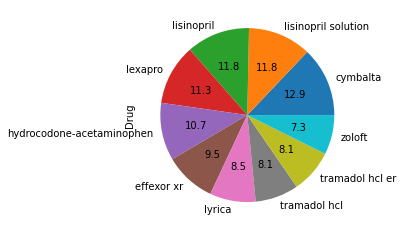

In [39]:
drug=data["Drug"].value_counts().head(10)
drug.plot(radius=1,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

In [40]:
# The most number of drug present in the dataset is lisinopril and lisinopril solution.
# Let's check for the side effects and other features of this drug.
# For that I am combining both these drug's data.
lisino=data.loc[data['Drug']=='lisinopril']
lisino_soln=data.loc[data['Drug']=='lisinopril solution']
lisino=lisino.append(lisino_soln)

In [41]:
# Now let's check the features.
lisino['Sides'].unique()

array(['Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.'],
      dtype=object)

In [42]:
lisino['Condition'].unique()

array(['High Blood Pressure', 'Kidney Disease from Diabetes',
       'Kidney Problem caused by Body Tissue Disease-Scleroderma',
       'Other', 'Chronic Heart Failure', 'Heart Attack',
       'Nondiabetic Proteinuric Nephropathy', 'Migraine Prevention',
       'Prevention of Recurrent Atrial Fibrillation',
       'Retinal Changes of Eye in a Patient with Diabetes',
       'Failure of the Left Ventricle of the Heart',
       'Diastolic Heart Failure'], dtype=object)

In [43]:
lisino['Age'].unique()

array([ 3,  1,  4,  5,  6,  7,  8,  9, 10, 11])

In [44]:
lisino['Sex'].unique()

array(['Female', 'Male', 'Others'], dtype=object)

In [45]:
lisino['Satisfaction'].unique()

array([2, 1, 5, 3, 4], dtype=int64)

The drug 'lisinopril' is used to treat patients with kidney problems, heart diseases and high blood pressure. Patients under all age group, except 3-6 years of age, use this medicine. The common side effect of this drug includes dizziness, lightheadedness, tiredness, headache or dry cough. The satisfication rating of the drug includes all 5 types of ratings.

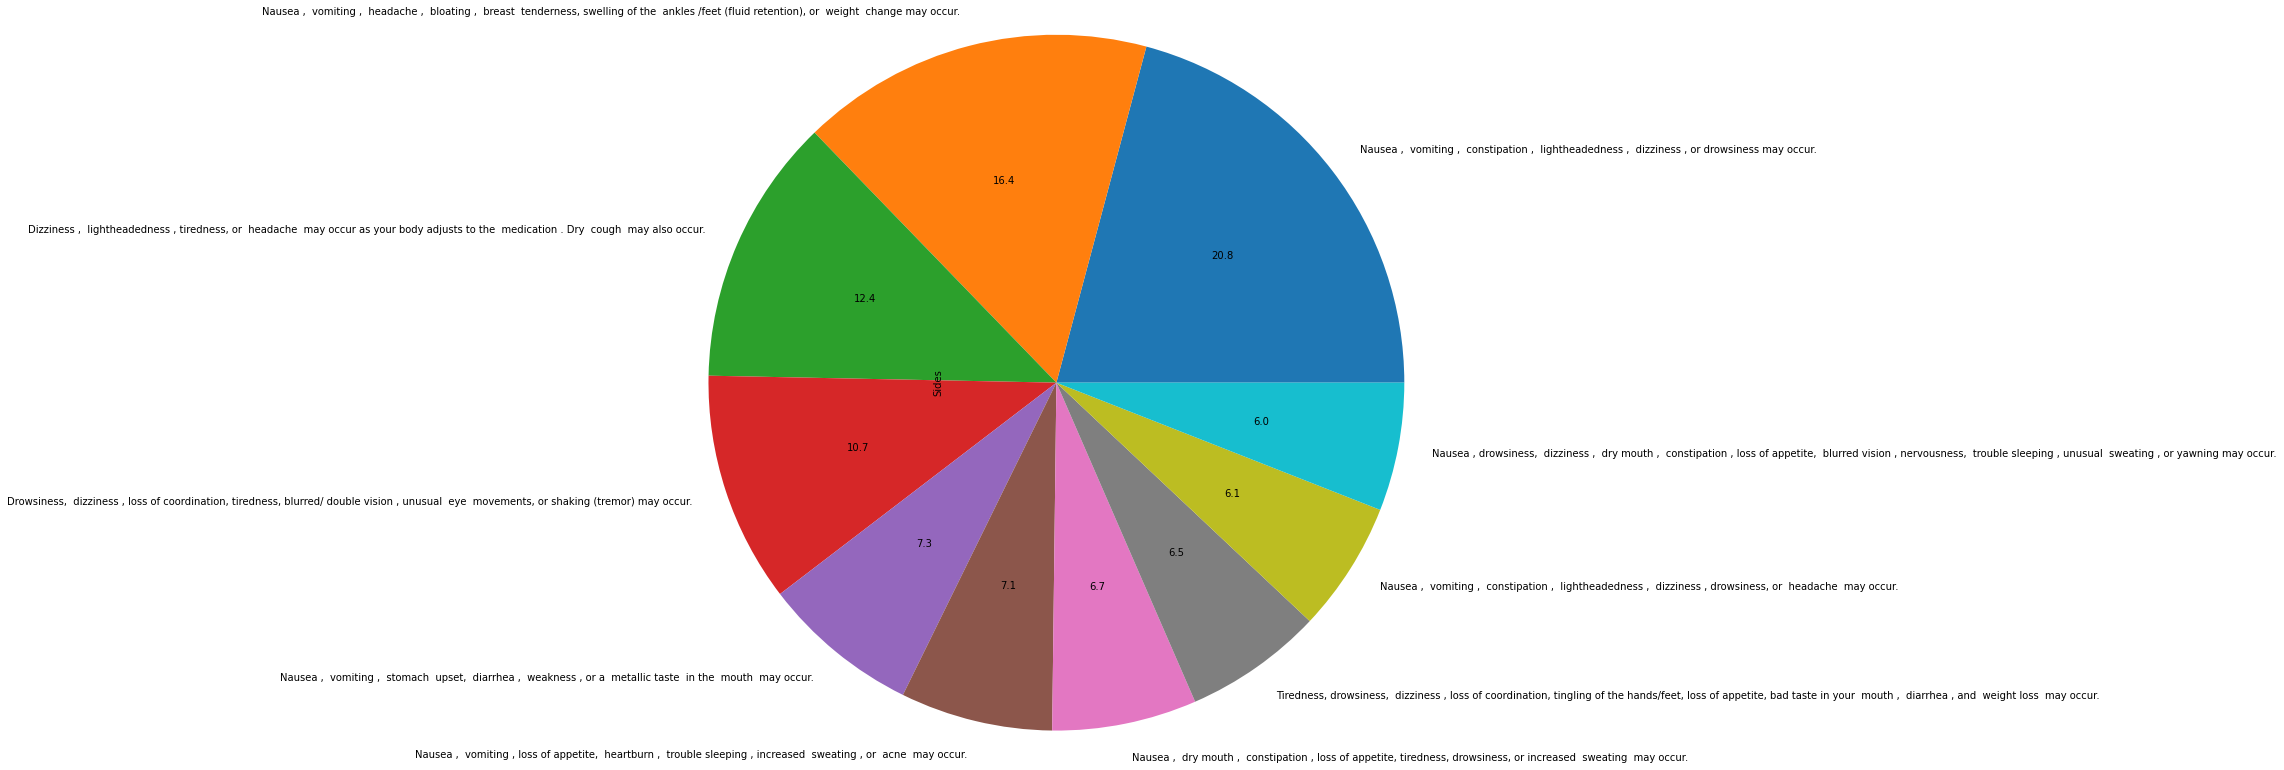

In [46]:
drug=data["Sides"].value_counts().head(10)
drug.plot(radius=4,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

In [47]:
data['Sides'].value_counts().head(2)

Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                       14851
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.    11690
Name: Sides, dtype: int64

The most common side effect experienced by the users in this dataset is 'Nausea ,  vomiting ,  constipation ,  lightheadedness, dizziness , or drowsiness'. It contributes 20.8% to the dataset and its count is  14851. 
The second most common side effect is 'Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the 
ankles /feet (fluid retention), or  weight  change'. It contributes 16.4% to the dataset with a count of 11690.

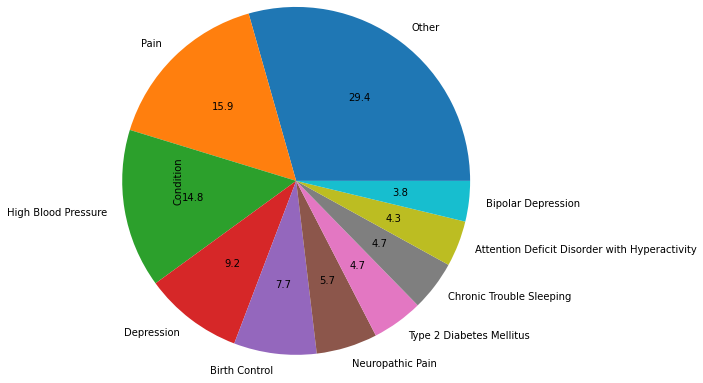

In [48]:
drug=data["Condition"].value_counts().head(10)
drug.plot(radius=2,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

From the pie chart, the top medical condition faced by users is given as 'Other' with 29.4%. Since this does not tell aboutany specific condition, the next common conditions is taken which is Pain and High Blood Pressure with 15.9% and 14.8% respectively.

C:\Users\malu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


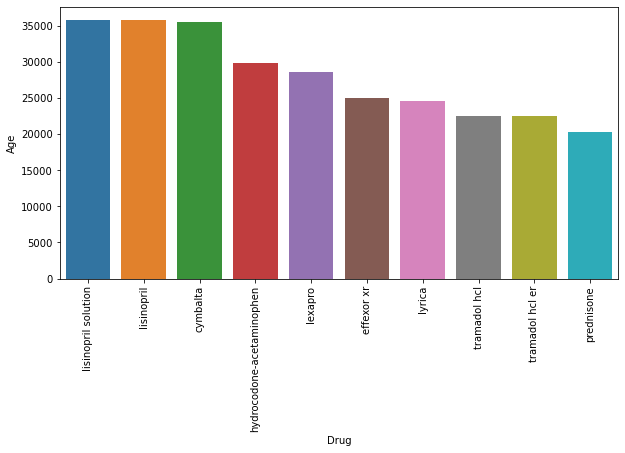

In [49]:
graph = data.groupby(by = data.Drug)['Age','Drug'].sum().reset_index().sort_values(by = 'Age', ascending = False).head(10)
plt.figure(figsize= (10,5))
plt.xticks(rotation=90)
sns.barplot(y=graph['Age'],x= graph["Drug"]);

Lisinopril and its solution is the top drug used by most of the age groups with a count of 35807.

In [50]:
graph = data.groupby(by = data.Condition)['Age','Condition'].sum().reset_index().sort_values(by = 'Age', ascending = False).head(10)
graph

C:\Users\malu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Condition,Age
1147,Other,346866
735,High Blood Pressure,197151
1163,Pain,188918
500,Depression,104036
1118,Neuropathic Pain,72472
235,Birth Control,65542
1634,Type 2 Diabetes Mellitus,63495
402,Chronic Trouble Sleeping,57267
232,Bipolar Depression,40822
190,Attention Deficit Disorder with Hyperactivity,37875


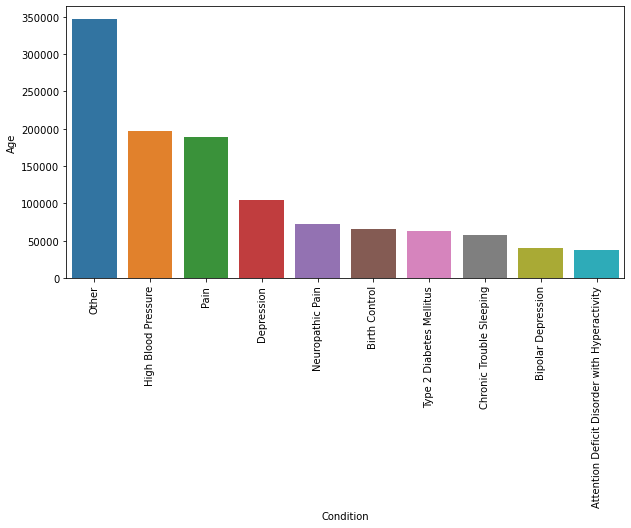

In [51]:
np.set_printoptions(threshold=sys.maxsize)
plt.figure(figsize= (10,5))
plt.xticks(rotation=90)
sns.barplot(y=graph['Age'],x= graph["Condition"]);

As before, the top medical condition faced by users is given as 'Other' when compared with age. So here also, since it do not tell about any specific condition, the next common conditions is taken which is High Blood Pressure and Pain. Thus we can say that age wise also most of the patients are taking medicines for pain and high blood pressure.

In [52]:
graph = data.groupby(by = data.Drug)['Satisfaction','Drug'].sum().reset_index().sort_values(by = 'Satisfaction', ascending = False).head(10)
graph

C:\Users\malu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Drug,Satisfaction
1541,cymbalta,13662
3338,lexapro,12761
3406,lisinopril solution,12333
3405,lisinopril,11923
2816,hydrocodone-acetaminophen,11245
5575,tramadol hcl er,9609
1978,effexor xr,9560
5574,tramadol hcl,9260
3524,lyrica,9258
4624,prednisone,8781


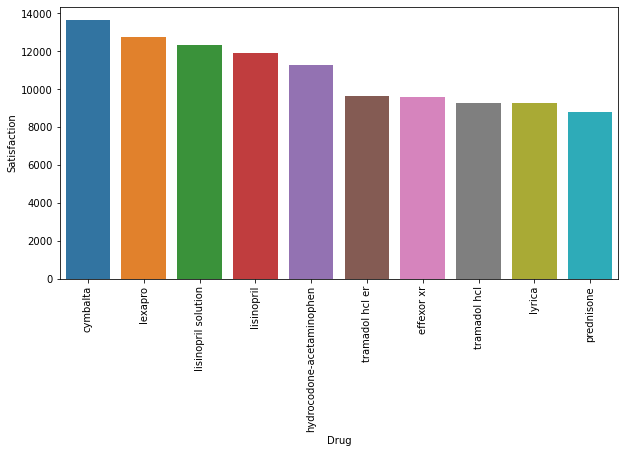

In [53]:
plt.figure(figsize= (10,5))
plt.xticks(rotation=90)
sns.barplot(y=graph['Satisfaction'],x= graph["Drug"]);

In [54]:
# Let's check much details about 'cymbalta'.
data.loc[data['Drug']=='cymbalta'].nunique()

Age              10
DrugId            1
Drug              1
Condition         8
Sides             1
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               3
UsefulCount      77
dtype: int64

In [55]:
data['Sides'][data['Drug'] == 'cymbalta'].iloc[0]

'Nausea ,  dry mouth ,  constipation , loss of appetite, tiredness, drowsiness, or increased  sweating  may occur.'

In [56]:
data['Condition'][data['Drug'] == 'cymbalta'].unique()

array(['Other', 'Neuropathic Pain',
       'Anxiousness associated with Depression',
       'Chronic Muscle or Bone Pain', 'Major Depressive Disorder',
       'Repeated Episodes of Anxiety',
       'Disorder characterized by Stiff, Tender & Painful Muscles',
       'Diabetic Complication causing Injury to some Body Nerves'],
      dtype=object)

In [57]:
data['Age'][data['Drug'] == 'cymbalta'].unique()

array([ 3,  1,  4,  5,  6,  7,  8,  9, 10, 11])

The drug 'cymbalta' is mainly used to treat patients with pain, depression and anxiety. Patients under all age group, except 3-6 years of age, use this medicine. The common side effect of this drug includes nausea, dry mouth, constipation, loss of appetite, tiredness, drowsiness or increased  sweating . The satisfaction, effectiveness and ease of use ratings of the drug includes all 5 types of ratings.

## Label encoding all categorical values.

In [58]:
data['Condition']=le.fit_transform(data['Condition']) 
data['Sides']=le.fit_transform(data['Sides']) 
data['Sex']=le.fit_transform(data['Sex']) 
data['Drug']=le.fit_transform(data['Drug']) 

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345163 entries, 0 to 362776
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Age            345163 non-null  int32
 1   DrugId         345163 non-null  int64
 2   Drug           345163 non-null  int32
 3   Condition      345163 non-null  int32
 4   Sides          345163 non-null  int32
 5   EaseofUse      345163 non-null  int64
 6   Effectiveness  345163 non-null  int64
 7   Satisfaction   345163 non-null  int64
 8   Sex            345163 non-null  int32
 9   UsefulCount    345163 non-null  int64
dtypes: int32(5), int64(5)
memory usage: 22.4 MB


In [60]:
# All values are label encoded.

In [61]:
data.head()

,Age,DrugId,Drug,Condition,Sides,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
0,9,54205,0,1397,1264,3,3,3,1,1
1,9,54205,0,1397,1264,4,4,3,1,1
2,9,54205,0,1397,1264,5,2,3,1,9
3,9,54205,0,1397,1264,5,5,5,1,2
4,9,54205,0,1397,1264,1,4,1,1,0


<AxesSubplot:>

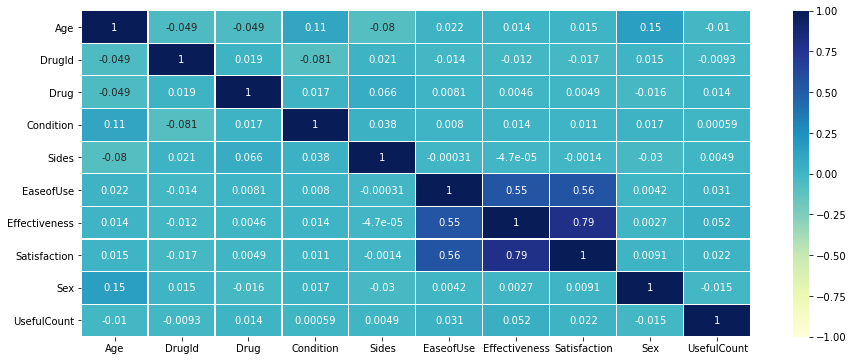

In [62]:
corr=data.corr()   #Checking for correlation
plt.figure(figsize=(15,6))
sns.heatmap(corr,vmin=-1,vmax=1,linewidths=.1,annot=True,cmap='YlGnBu')

# Splitting the dataset

In [63]:
Y=data['Sides']
X=data.drop(['Sides','UsefulCount'],axis=1)

## Splitting into train and test set.

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=.3)

In [65]:
X.head()

,Age,DrugId,Drug,Condition,EaseofUse,Effectiveness,Satisfaction,Sex
0,9,54205,0,1397,3,3,3,1
1,9,54205,0,1397,4,4,3,1
2,9,54205,0,1397,5,2,3,1
3,9,54205,0,1397,5,5,5,1
4,9,54205,0,1397,1,4,1,1


In [66]:
Y.head()

0    1264
1    1264
2    1264
3    1264
4    1264
Name: Sides, dtype: int32

In [67]:
print((x_train.shape),(y_train.shape))

(241614, 8) (241614,)


In [68]:
print((x_test.shape),(y_test.shape))

(103549, 8) (103549,)


In [69]:
# pd.Series(X.feature_importances_,index=X.columns).sort_values(ascending=False)*100

## Building Models

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,make_scorer

## 1) Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)

In [52]:
print('accuracy {:.2f}'.format(accuracy_score(y_test,y_pred_gnb)))
print('precision  {:.2f}'.format(precision_score(y_test,y_pred_gnb,average='weighted')))
print('recall score {:.2f}'.format(recall_score(y_test,y_pred_gnb,average='weighted')))
print('f1 score {:.2f}'.format(f1_score(y_test,y_pred_gnb,average='weighted')))

accuracy 0.50


C:\Users\malu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision  0.43


C:\Users\malu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall score 0.50
f1 score 0.44


## 2) Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

In [72]:
print('accuracy {:.2f}'.format(accuracy_score(y_test,y_pred_dt)))
print('precision  {:.2f}'.format(precision_score(y_test,y_pred_dt,average='weighted')))
print('recall score {:.2f}'.format(recall_score(y_test,y_pred_dt,average='weighted')))
print('f1 score {:.2f}'.format(f1_score(y_test,y_pred_dt,average='weighted')))

accuracy 0.99
precision  0.99
recall score 0.99
f1 score 0.99


C:\Users\malu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3) KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [74]:
print('accuracy {:.2f}'.format(accuracy_score(y_test,y_pred_knn)))
print('precision  {:.2f}'.format(precision_score(y_test,y_pred_knn,average='weighted')))
print('recall score {:.2f}'.format(recall_score(y_test,y_pred_knn,average='weighted')))
print('f1 score {:.2f}'.format(f1_score(y_test,y_pred_knn,average='weighted')))

accuracy 0.95
precision  0.95
recall score 0.95
f1 score 0.95


C:\Users\malu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparameter Tuning our Models

## 1) Gaussian NB (Hyperparameterized)

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None, var_smoothing=1e-07)
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)

In [62]:
print('accuracy {:.2f}'.format(accuracy_score(y_test,y_pred_gnb)))
print('precision  {:.2f}'.format(precision_score(y_test,y_pred_gnb,average='weighted')))
print('recall score {:.2f}'.format(recall_score(y_test,y_pred_gnb,average='weighted')))
print('f1 score {:.2f}'.format(f1_score(y_test,y_pred_gnb,average='weighted')))

accuracy 0.47


C:\Users\malu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision  0.38
recall score 0.47
f1 score 0.40


## 2) Decision Tree (Hyperparameterized)

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(ccp_alpha=0.0,random_state=42, criterion='entropy')
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

In [76]:
print('accuracy {:.2f}'.format(accuracy_score(y_test,y_pred_dt)))
print('precision  {:.2f}'.format(precision_score(y_test,y_pred_dt,average='weighted')))
print('recall score {:.2f}'.format(recall_score(y_test,y_pred_dt,average='weighted')))
print('f1 score {:.2f}'.format(f1_score(y_test,y_pred_dt,average='weighted')))

accuracy 0.99
precision  0.99
recall score 0.99
f1 score 0.99


C:\Users\malu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3) KNN (Hyperparameterized)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [78]:
print('accuracy {:.2f}'.format(accuracy_score(y_test,y_pred_knn)))
print('precision  {:.2f}'.format(precision_score(y_test,y_pred_knn,average='weighted')))
print('recall score {:.2f}'.format(recall_score(y_test,y_pred_knn,average='weighted')))
print('f1 score {:.2f}'.format(f1_score(y_test,y_pred_knn,average='weighted')))

accuracy 0.96
precision  0.96
recall score 0.96
f1 score 0.96


C:\Users\malu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
pd.Series(dt.feature_importances_,index=X.columns).sort_values(ascending=False)*100

DrugId           75.932122
Drug             23.271513
Condition         0.600739
Age               0.140234
Satisfaction      0.015117
Sex               0.014608
Effectiveness     0.013615
EaseofUse         0.012052
dtype: float64

In [81]:
out=knn.predict([[9, 2934, 0, 1431, 3, 3, 3, 2]])

In [82]:
out

array([689])

In [83]:
out1=knn.predict([[9,54205,0,1397,3,3,3,1]])
out1

array([1264])

In [90]:
out2=knn.predict([[9,6,0,1397,3,3,3,1]])
out2

array([1136])

In [91]:
out3=knn.predict([[2,4560,784,997,5,5,5,2]])
out3

array([351])

### Conclusion

We chose KNN as our main model which has predicted 96% accuracy with 96% precision. So with the help of our model we understand that `Age`, `Condition`, `Drug`, `Sex` and `Satisfaction` are the main features that classifies a side effect from given input.